In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf
import datetime

from numpy import inf

from IPython.display import display, HTML
display(HTML(""" <style> .output {display: center; align-items: left; text-align: center; justify-content: center; } </style> """))

In [2]:
#Importación de datos
datos = pd.read_excel('Generación Intermitente de la GCROC 2013-2020.xlsx', header=1)

In [3]:
numbers = datos.hora-1
hours = [datetime.time(num).strftime("%H:00:00") for num in numbers]
datos['fecha'] = datos['fecha'].replace(0,np.nan).ffill()
datos['fecha'] = pd.to_datetime(datos['fecha'])
datos['fecha'] = datos['fecha'].dt.date
datos['fecha_hora'] = datos["fecha"].astype(str) + ' ' + hours
datos.head()

Unnamed: 0 dia de la semana       fecha  hora  GICIE301  GICIE302  \
0         NaN           Jueves  2013-11-14     1       0.0       NaN   
1         NaN              NaN  2013-11-14     2       0.0       NaN   
2         NaN              NaN  2013-11-14     3       0.0       NaN   
3         NaN              NaN  2013-11-14     4       0.0       NaN   
4         NaN              NaN  2013-11-14     5       0.0       NaN   

   GICIE303  GICIE304  GICIE305  GICIS306  ...  GICIS318  GICIS319  GICIS320  \
0       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   

   GICIS321  GICIS322  GICIS323  GICIS324  GICIS325  GICIS326  \
0       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN   

            fecha_hora  
0  2013-11-14 00:00:00  
1  2013-11-14 01:00:00  
2  2013-11-14 02:00:00  
3  2013-11-14 03:00:00  
4  2013-11-14 04:00:00  

[5 rows x 31 columns]

In [4]:
datos.tail()

Unnamed: 0 dia de la semana       fecha  hora  GICIE301  GICIE302  \
55387         NaN              NaN  2020-03-09    20   12140.0    6879.0   
55388         NaN              NaN  2020-03-09    21    4313.0   31473.0   
55389         NaN              NaN  2020-03-09    22      98.0   54796.0   
55390         NaN              NaN  2020-03-09    23     803.0   57081.0   
55391         NaN              NaN  2020-03-09    24    7594.0   56351.0   

       GICIE303  GICIE304  GICIE305  GICIS306  ...  GICIS318  GICIS319  \
55387   26607.0   19358.0   10983.0       0.0  ...       0.0       0.0   
55388   14942.0    3029.0   15129.0       0.0  ...       0.0       0.0   
55389   33875.0   22778.0    8490.0       0.0  ...       0.0       0.0   
55390   34073.0   36240.0   16482.0       0.0  ...       0.0       0.0   
55391   39697.0   45519.0   22479.0       0.0  ...       0.0       0.0   

       GICIS320  GICIS321  GICIS322  GICIS323  GICIS324  GICIS325  GICIS326  \
55387       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
55388       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
55389       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
55390       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
55391       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

                fecha_hora  
55387  2020-03-09 19:00:00  
55388  2020-03-09 20:00:00  
55389  2020-03-09 21:00:00  
55390  2020-03-09 22:00:00  
55391  2020-03-09 23:00:00  

[5 rows x 31 columns]

In [57]:
help(datos.pivot)

Help on method pivot in module pandas.core.frame:

pivot(index=None, columns=None, values=None) method of pandas.core.frame.DataFrame instance
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    index : string or object, optional
        Column to use to make new frame's index. If None, uses
        existing index.
    columns : string or object
        Column to use to make new frame's columns.
    values : string, object or a list of the previous, optional
        Column(s) to use for populating new frame's values. If not
        specified, all remaining columns will be used and 

In [83]:
data2 = datos[['fecha','hora','GICIS310']]
data2

fecha  hora  GICIS310
0      2013-11-14     1       NaN
1      2013-11-14     2       NaN
2      2013-11-14     3       NaN
3      2013-11-14     4       NaN
4      2013-11-14     5       NaN
...           ...   ...       ...
55387  2020-03-09    20       0.0
55388  2020-03-09    21       0.0
55389  2020-03-09    22       0.0
55390  2020-03-09    23       0.0
55391  2020-03-09    24       0.0

[55392 rows x 3 columns]

In [84]:
a = data2.pivot_table(columns = 'hora')
a

hora             1          2          3         4    5    6          7   \
GICIS310  18.964143  18.659363  17.256972  9.790837  0.0  0.0  15.019669   

hora               8             9              10  ...             15  \
GICIS310  8746.420969  67344.112122  111377.126231  ...  129022.939213   

hora                 16             17            18            19  \
GICIS310  120423.930933  104377.540556  70128.035195  33364.704582   

hora                20         21         22         23         24  
GICIS310  10120.033163  178.34263  16.354582  16.354582  16.354582  

[1 rows x 24 columns]

In [6]:
n_periods = 5*24

In [5]:
#LIMPIEZA DE DATOS
datos = datos.set_index(datos['fecha_hora'])
datos = datos[53736:]

In [7]:
columns = ['GICIE301', 'GICIE302','GICIE303','GICIE304','GICIE305','GICIS306', 'GICIS307','GICIS308',
          'GICIS309','GICIS310','GICIS311','GICIS312','GICIS313','GICIS314''GICIS315','GICIS316','GICIS317',
          'GICIS318','GICIS319','GICIS320','GICIS321','GICIS322','GICIS323','GICIS324','GICIS325','GICIS326']

In [9]:
columna = columns[9]
columna

'GICIS310'

In [10]:
def mape(forecast, actual):
    return np.mean(np.abs((forecast - actual)/actual))  # MAPE

In [11]:
def AIC_accuracy(train,test):
    fcc = []
    for i in range(8,21):
        
        data = train['Hora '+str(i)].dropna()
        model = pm.auto_arima(data.values, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=5, max_q=5, # maximum p and q
                          m=12,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        #model.fit(data.values)
        #print(model)
        #model.plot_diagnostics(figsize=(7,5))
        #plt.show()
        # Predicción
        fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
        fcc.append(fc)
    return(fcc, model)

In [12]:
data2 = datos[['hora',columna]]
data2[columna] = (data2[columna]) # para efectos de las tranformaciones logaritmicas(eliminar el 0)
#data2 = data2.dropna()
data2

hora  GICIS310
fecha_hora                         
2020-01-01 00:00:00     1       0.0
2020-01-01 01:00:00     2       0.0
2020-01-01 02:00:00     3       0.0
2020-01-01 03:00:00     4       0.0
2020-01-01 04:00:00     5       0.0
2020-01-01 05:00:00     6       0.0
2020-01-01 06:00:00     7       0.0
2020-01-01 07:00:00     8     844.0
2020-01-01 08:00:00     9   38725.0
2020-01-01 09:00:00    10   40439.0
2020-01-01 10:00:00    11  121572.0
2020-01-01 11:00:00    12  125271.0
2020-01-01 12:00:00    13  143290.0
2020-01-01 13:00:00    14  146646.0
2020-01-01 14:00:00    15  104020.0
2020-01-01 15:00:00    16   68341.0
2020-01-01 16:00:00    17   38704.0
2020-01-01 17:00:00    18   17843.0
2020-01-01 18:00:00    19       0.0
2020-01-01 19:00:00    20       0.0
2020-01-01 20:00:00    21       0.0
2020-01-01 21:00:00    22       0.0
2020-01-01 22:00:00    23       0.0
2020-01-01 23:00:00    24       0.0
2020-01-02 00:00:00     1       0.0
2020-01-02 01:00:00     2       0.0
2020-01-02 02:00:00     3       0.0
2020-01-02 03:00:00     4       0.0
2020-01-02 04:00:00     5       0.0
2020-01-02 05:00:00     6       0.0
...                   ...       ...
2020-03-08 18:00:00    19   18493.0
2020-03-08 19:00:00    20       0.0
2020-03-08 20:00:00    21       0.0
2020-03-08 21:00:00    22       0.0
2020-03-08 22:00:00    23       0.0
2020-03-08 23:00:00    24       0.0
2020-03-09 00:00:00     1       0.0
2020-03-09 01:00:00     2       0.0
2020-03-09 02:00:00     3       0.0
2020-03-09 03:00:00     4       0.0
2020-03-09 04:00:00     5       0.0
2020-03-09 05:00:00     6       0.0
2020-03-09 06:00:00     7       0.0
2020-03-09 07:00:00     8    4871.0
2020-03-09 08:00:00     9   35284.0
2020-03-09 09:00:00    10  102803.0
2020-03-09 10:00:00    11  169574.0
2020-03-09 11:00:00    12  167916.0
2020-03-09 12:00:00    13  164215.0
2020-03-09 13:00:00    14  153332.0
2020-03-09 14:00:00    15   92871.0
2020-03-09 15:00:00    16   52542.0
2020-03-09 16:00:00    17   35075.0
2020-03-09 17:00:00    18   11967.0
2020-03-09 18:00:00    19     815.0
2020-03-09 19:00:00    20       0.0
2020-03-09 20:00:00    21       0.0
2020-03-09 21:00:00    22       0.0
2020-03-09 22:00:00    23       0.0
2020-03-09 23:00:00    24       0.0

[1656 rows x 2 columns]

In [13]:
#Se separará por hora del día, ya que cada hora se comporta diferente.
xhr = pd.DataFrame() ; log = pd.DataFrame() ; rends = pd.DataFrame() ; rlogs = pd.DataFrame()
ano,dia,hora= str(data2.index[1])[0:4], str(data2.index[1])[5:7] ,str(data2.index[1])[8:10]

In [14]:
#El siguiente ciclo 'for' crea un DataFrame acomodado por horas, de cada planta de generación.
for i in range(1,25):
    hrs = [data2.iloc[j][1] for j in range(len(data2)) if data2.iloc[j][0] == i ] #pd.Series()
    xhr['Hora '+str(i)] = hrs
xhr

Hora 1  Hora 2  Hora 3  Hora 4  Hora 5  Hora 6  Hora 7        Hora 8  \
0      0.0     0.0     0.0     0.0     0.0     0.0     0.0    844.000000   
1      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2403.000000   
2      0.0     0.0     0.0     0.0     0.0     0.0     0.0   1634.000000   
3      0.0     0.0     0.0     0.0     0.0     0.0     0.0   3719.000000   
4      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2755.000000   
5      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2878.000000   
6      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2074.000000   
7      0.0     0.0     0.0     0.0     0.0     0.0     0.0   4308.000000   
8      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2457.000000   
9      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2337.000000   
10     0.0     0.0     0.0     0.0     0.0     0.0     0.0    355.000000   
11     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2813.000000   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2972.000000   
13     0.0     0.0     0.0     0.0     0.0     0.0     0.0    677.000000   
14     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2801.000000   
15     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1455.000000   
16     0.0     0.0     0.0     0.0     0.0     0.0     0.0     28.000000   
17     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1161.000000   
18     0.0     0.0     0.0     0.0     0.0     0.0     0.0    910.000000   
19     0.0     0.0     0.0     0.0     0.0     0.0     0.0     46.000000   
20     0.0     0.0     0.0     0.0     0.0     0.0     0.0    526.000000   
21     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1055.000000   
22     0.0     0.0     0.0     0.0     0.0     0.0     0.0    444.000000   
23     0.0     0.0     0.0     0.0     0.0     0.0     0.0    878.000000   
24     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1385.000000   
25     0.0     0.0     0.0     0.0     0.0     0.0     0.0    395.000000   
26     0.0     0.0     0.0     0.0     0.0     0.0     0.0   3117.000000   
27     0.0     0.0     0.0     0.0     0.0     0.0     0.0   6330.000000   
28     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1425.000000   
29     0.0     0.0     0.0     0.0     0.0     0.0     0.0   3855.000000   
..     ...     ...     ...     ...     ...     ...     ...           ...   
39     0.0     0.0     0.0     0.0     0.0     0.0     0.0   4319.000000   
40     0.0     0.0     0.0     0.0     0.0     0.0     0.0   4124.000000   
41     0.0     0.0     0.0     0.0     0.0     0.0     0.0   3816.000000   
42     0.0     0.0     0.0     0.0     0.0     0.0     0.0   9775.000000   
43     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1695.000000   
44     0.0     0.0     0.0     0.0     0.0     0.0     0.0    705.000000   
45     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2836.000000   
46     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2317.951456   
47     0.0     0.0     0.0     0.0     0.0     0.0     0.0  13136.000000   
48     0.0     0.0     0.0     0.0     0.0     0.0     0.0  13214.000000   
49     0.0     0.0     0.0     0.0     0.0     0.0     0.0  10237.000000   
50     0.0     0.0     0.0     0.0     0.0     0.0     0.0  13635.000000   
51     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.000000   
52     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2686.000000   
53     0.0     0.0     0.0     0.0     0.0     0.0     0.0   9609.000000   
54     0.0     0.0     0.0     0.0     0.0     0.0     0.0  18308.000000   
55     0.0     0.0     0.0     0.0     0.0     0.0     0.0   9097.000000   
56     0.0     0.0     0.0     0.0     0.0     0.0     0.0   6031.000000   
57     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2292.000000   
58     0.0     0.0     0.0     0.0     0.0     0.0     0.0  11840.000000   
59     0.0     0.0     0.0     0.0     0.0     0.0  

In [15]:
#Se va a trabajar con logaritmicos, porque esta transformación no afecta el vlaor, sino solo su rango.
#log = np.log(xhr+1)
log = xhr
log

Hora 1  Hora 2  Hora 3  Hora 4  Hora 5  Hora 6  Hora 7        Hora 8  \
0      0.0     0.0     0.0     0.0     0.0     0.0     0.0    844.000000   
1      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2403.000000   
2      0.0     0.0     0.0     0.0     0.0     0.0     0.0   1634.000000   
3      0.0     0.0     0.0     0.0     0.0     0.0     0.0   3719.000000   
4      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2755.000000   
5      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2878.000000   
6      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2074.000000   
7      0.0     0.0     0.0     0.0     0.0     0.0     0.0   4308.000000   
8      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2457.000000   
9      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2337.000000   
10     0.0     0.0     0.0     0.0     0.0     0.0     0.0    355.000000   
11     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2813.000000   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2972.000000   
13     0.0     0.0     0.0     0.0     0.0     0.0     0.0    677.000000   
14     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2801.000000   
15     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1455.000000   
16     0.0     0.0     0.0     0.0     0.0     0.0     0.0     28.000000   
17     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1161.000000   
18     0.0     0.0     0.0     0.0     0.0     0.0     0.0    910.000000   
19     0.0     0.0     0.0     0.0     0.0     0.0     0.0     46.000000   
20     0.0     0.0     0.0     0.0     0.0     0.0     0.0    526.000000   
21     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1055.000000   
22     0.0     0.0     0.0     0.0     0.0     0.0     0.0    444.000000   
23     0.0     0.0     0.0     0.0     0.0     0.0     0.0    878.000000   
24     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1385.000000   
25     0.0     0.0     0.0     0.0     0.0     0.0     0.0    395.000000   
26     0.0     0.0     0.0     0.0     0.0     0.0     0.0   3117.000000   
27     0.0     0.0     0.0     0.0     0.0     0.0     0.0   6330.000000   
28     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1425.000000   
29     0.0     0.0     0.0     0.0     0.0     0.0     0.0   3855.000000   
..     ...     ...     ...     ...     ...     ...     ...           ...   
39     0.0     0.0     0.0     0.0     0.0     0.0     0.0   4319.000000   
40     0.0     0.0     0.0     0.0     0.0     0.0     0.0   4124.000000   
41     0.0     0.0     0.0     0.0     0.0     0.0     0.0   3816.000000   
42     0.0     0.0     0.0     0.0     0.0     0.0     0.0   9775.000000   
43     0.0     0.0     0.0     0.0     0.0     0.0     0.0   1695.000000   
44     0.0     0.0     0.0     0.0     0.0     0.0     0.0    705.000000   
45     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2836.000000   
46     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2317.951456   
47     0.0     0.0     0.0     0.0     0.0     0.0     0.0  13136.000000   
48     0.0     0.0     0.0     0.0     0.0     0.0     0.0  13214.000000   
49     0.0     0.0     0.0     0.0     0.0     0.0     0.0  10237.000000   
50     0.0     0.0     0.0     0.0     0.0     0.0     0.0  13635.000000   
51     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.000000   
52     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2686.000000   
53     0.0     0.0     0.0     0.0     0.0     0.0     0.0   9609.000000   
54     0.0     0.0     0.0     0.0     0.0     0.0     0.0  18308.000000   
55     0.0     0.0     0.0     0.0     0.0     0.0     0.0   9097.000000   
56     0.0     0.0     0.0     0.0     0.0     0.0     0.0   6031.000000   
57     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2292.000000   
58     0.0     0.0     0.0     0.0     0.0     0.0     0.0  11840.000000   
59     0.0     0.0     0.0     0.0     0.0     0.0  

In [16]:
#Se le cambia el index a los DataFrame creados, por las fechas que son.
xhr = xhr.set_index(pd.date_range(start=datos['fecha'][0],end=datos['fecha'][-1],freq='d'))
xhr

Hora 1  Hora 2  Hora 3  Hora 4  Hora 5  Hora 6  Hora 7  \
2020-01-01     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-02     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-03     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-04     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-05     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-06     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-07     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-08     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-09     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-10     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-11     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-12     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-13     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-14     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-15     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-16     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-17     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-18     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-19     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-20     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-21     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-22     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-23     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-24     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-25     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-26     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-27     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-28     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-29     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-01-30     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...            ...     ...     ...     ...     ...     ...     ...   
2020-02-09     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-10     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-11     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-12     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-13     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-14     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-15     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-16     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-17     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-18     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-19     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-20     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-21     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-22     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-23     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-24     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-25     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-26     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-27     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-28     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-02-29     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-03-01     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-03-02     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-03-03     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-03-04     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-03-05     0.0    

In [18]:
#Seleccion de y_train y y_test
test = (xhr.iloc[-5:,:])   # INFO DE TEST
train = log.drop(log.index[1945:]) # QUITANDO TEST PARA TRAIN

In [19]:
train,test

(    Hora 1  Hora 2  Hora 3  Hora 4  Hora 5  Hora 6  Hora 7        Hora 8  \
 0      0.0     0.0     0.0     0.0     0.0     0.0     0.0    844.000000   
 1      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2403.000000   
 2      0.0     0.0     0.0     0.0     0.0     0.0     0.0   1634.000000   
 3      0.0     0.0     0.0     0.0     0.0     0.0     0.0   3719.000000   
 4      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2755.000000   
 5      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2878.000000   
 6      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2074.000000   
 7      0.0     0.0     0.0     0.0     0.0     0.0     0.0   4308.000000   
 8      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2457.000000   
 9      0.0     0.0     0.0     0.0     0.0     0.0     0.0   2337.000000   
 10     0.0     0.0     0.0     0.0     0.0     0.0     0.0    355.000000   
 11     0.0     0.0     0.0     0.0     0.0     0.0     0.0   2813.000000   

In [78]:
fcc = []

#MODELO ARIMA
for i in range(8,21):
    y_train = train['Hora '+str(i)].dropna()

    model = pm.auto_arima(y_train.values, start_p=1, start_q=1,
        test='adf',       # use adftest to find optimal 'd'
        max_p=4, max_q=4, # maximum p and q
        m=12,              # frequency of series
        d=None,           # let model determine 'd'
        seasonal=True,    # No Seasonality
        stepwise=True)   

    model.fit(y_train.values)
    #print(model)
    #model.plot_diagnostics(figsize=(7,5))
    #plt.show()

    # Predicción
    fc, confint = model.predict(n_periods=len(test), return_conf_int=True)
    fcc.append(fc)

fc, model = AIC_accuracy(train,test)

NameError: name 'train' is not defined

In [79]:
model.summary()

NameError: name 'model' is not defined

In [22]:
fc

[array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.7

In [23]:
fcc

[array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([ 8135.04009455, 13363.18522045, 16050.16489296, 19690.99745086,
        20583.70476872]),
 array([ 60450.69758849,  84204.6459834 ,  93968.98725639,  98566.03399897,
        101160.84298176]),
 array([126254.85790657, 134227.21398574, 140036.28550421, 140992.32650288,
  

In [24]:
mapes = [mape(fcc[i-1], (test['Hora '+str(i)])) for i in range(1,25)]
mapes = pd.DataFrame(mapes).dropna()
mapes[mapes == inf] = 0
mape_promedio = np.mean(mapes)

In [25]:
dias = []
for j in range(0,5):
    dias.append([([ fc[i][j] for i in range(len(fc))])][0])
pronostico = pd.DataFrame(np.concatenate(dias))
start=datos['fecha'][0]
pronostico = pronostico.set_index(pd.date_range(test.index[0],periods=len(pronostico),freq='H'))
pronostico.index = pronostico.index.map(str)

In [26]:
pronostico

0
2020-03-05 00:00:00      -0.000004
2020-03-05 01:00:00      -0.000004
2020-03-05 02:00:00      -0.000004
2020-03-05 03:00:00      -0.000004
2020-03-05 04:00:00      -0.000004
2020-03-05 05:00:00      -0.000004
2020-03-05 06:00:00      -0.000004
2020-03-05 07:00:00    8135.040095
2020-03-05 08:00:00   60450.697588
2020-03-05 09:00:00  126254.857907
2020-03-05 10:00:00  140181.346784
2020-03-05 11:00:00  148747.325967
2020-03-05 12:00:00  150432.899327
2020-03-05 13:00:00  157077.455647
2020-03-05 14:00:00   91390.118540
2020-03-05 15:00:00   62188.911980
2020-03-05 16:00:00   74308.473316
2020-03-05 17:00:00   30377.807980
2020-03-05 18:00:00    3506.632419
2020-03-05 19:00:00      -0.000004
2020-03-05 20:00:00      -0.000004
2020-03-05 21:00:00      -0.000004
2020-03-05 22:00:00      -0.000004
2020-03-05 23:00:00      -0.000004
2020-03-06 00:00:00      -0.000004
2020-03-06 01:00:00      -0.000004
2020-03-06 02:00:00      -0.000004
2020-03-06 03:00:00      -0.000004
2020-03-06 04:00:00      -0.000004
2020-03-06 05:00:00      -0.000004
...                            ...
2020-03-08 18:00:00     406.379786
2020-03-08 19:00:00      -0.000004
2020-03-08 20:00:00      -0.000004
2020-03-08 21:00:00      -0.000004
2020-03-08 22:00:00      -0.000004
2020-03-08 23:00:00      -0.000004
2020-03-09 00:00:00      -0.000004
2020-03-09 01:00:00      -0.000004
2020-03-09 02:00:00      -0.000004
2020-03-09 03:00:00      -0.000004
2020-03-09 04:00:00      -0.000004
2020-03-09 05:00:00      -0.000004
2020-03-09 06:00:00      -0.000004
2020-03-09 07:00:00   20583.704769
2020-03-09 08:00:00  101160.842982
2020-03-09 09:00:00  141612.748678
2020-03-09 10:00:00  141506.804775
2020-03-09 11:00:00  150173.765132
2020-03-09 12:00:00  151806.541789
2020-03-09 13:00:00  159047.887471
2020-03-09 14:00:00  114715.507051
2020-03-09 15:00:00   88872.788100
2020-03-09 16:00:00  100841.989727
2020-03-09 17:00:00   27691.681080
2020-03-09 18:00:00     775.722257
2020-03-09 19:00:00      -0.000004
2020-03-09 20:00:00      -0.000004
2020-03-09 21:00:00      -0.000004
2020-03-09 22:00:00      -0.000004
2020-03-09 23:00:00      -0.000004

[120 rows x 1 columns]

In [27]:
datos[columna][-1-19*24:]

fecha_hora
2020-02-19 23:00:00         0.0
2020-02-20 00:00:00         0.0
2020-02-20 01:00:00         0.0
2020-02-20 02:00:00         0.0
2020-02-20 03:00:00         0.0
2020-02-20 04:00:00         0.0
2020-02-20 05:00:00         0.0
2020-02-20 06:00:00         0.0
2020-02-20 07:00:00     13635.0
2020-02-20 08:00:00    128335.0
2020-02-20 09:00:00    169890.0
2020-02-20 10:00:00    169814.0
2020-02-20 11:00:00    170384.0
2020-02-20 12:00:00    170347.0
2020-02-20 13:00:00    170389.0
2020-02-20 14:00:00    170223.0
2020-02-20 15:00:00    169069.0
2020-02-20 16:00:00    164001.0
2020-02-20 17:00:00    117393.0
2020-02-20 18:00:00     10280.0
2020-02-20 19:00:00         0.0
2020-02-20 20:00:00         0.0
2020-02-20 21:00:00         0.0
2020-02-20 22:00:00         0.0
2020-02-20 23:00:00         0.0
2020-02-21 00:00:00         0.0
2020-02-21 01:00:00         0.0
2020-02-21 02:00:00         0.0
2020-02-21 03:00:00         0.0
2020-02-21 04:00:00         0.0
                         ... 

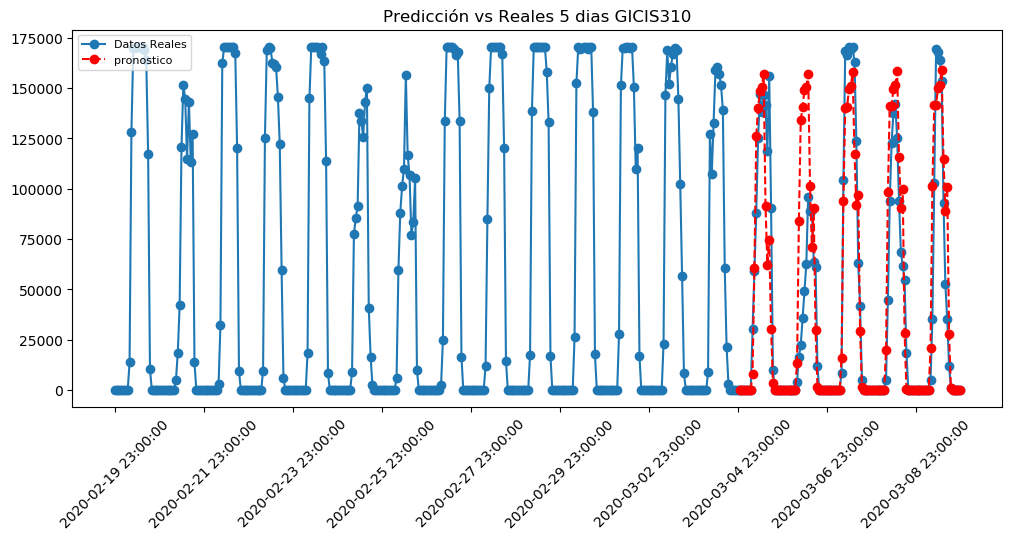

0    0.385747
dtype: float64


In [28]:
arange_dates = []
arange_no = []
arange = datos[columna][-1-19*24:].index
for i in range(0,len(arange),48):
    arange_dates.append(arange[i])
    arange_no.append(i)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(datos[columna][-1-19*24:], 'o-', label = 'Datos Reales')
plt.plot(pronostico, 'o--', label='pronostico',color ='r')
plt.title('Predicción vs Reales 5 dias '+columna)
plt.xticks(arange_no,arange_dates,rotation = 45)
plt.legend(loc='upper left', fontsize=8)
plt.show()

print(mape_promedio)
#print(fc)
#print(model)

In [29]:
Forecasts = pd.DataFrame(fcc).dropna().T

In [30]:
Forecasts.index = test.index
Forecasts.columns = test.columns
round(Forecasts,2)

Hora 1  Hora 2  Hora 3  Hora 4  Hora 5  Hora 6  Hora 7    Hora 8  \
2020-03-05    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   8135.04   
2020-03-06    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0  13363.19   
2020-03-07    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0  16050.16   
2020-03-08    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0  19691.00   
2020-03-09    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0  20583.70   

               Hora 9    Hora 10   ...       Hora 15   Hora 16    Hora 17  \
2020-03-05   60450.70  126254.86   ...      91390.12  62188.91   74308.47   
2020-03-06   84204.65  134227.21   ...     101507.34  71039.14   90409.57   
2020-03-07   93968.99  140036.29   ...     117179.01  92147.11   97017.33   
2020-03-08   98566.03  140992.33   ...     115947.26  90509.95   99729.10   
2020-03-09  101160.84  141612.75   ...     114715.51  88872.79  100841.99   

             Hora 18  Hora 19  Hora 20  Hora 21  Hora 22  Hora 23  Hora 24  
2020-03-05  30377.81  5037.50     -0.0     -0.0     -0.0     -0.0     -0.0  
2020-03-06  29706.28  2007.05     -0.0     -0.0     -0.0     -0.0     -0.0  
2020-03-07  29034.74   687.27     -0.0     -0.0     -0.0     -0.0     -0.0  
2020-03-08  28363.21   854.84     -0.0     -0.0     -0.0     -0.0     -0.0  
2020-03-09  27691.68   927.15     -0.0     -0.0     -0.0     -0.0     -0.0  

[5 rows x 24 columns]

In [31]:
test

Hora 1  Hora 2  Hora 3  Hora 4  Hora 5  Hora 6  Hora 7   Hora 8  \
2020-03-05     0.0     0.0     0.0     0.0     0.0     0.0     0.0  30126.0   
2020-03-06     0.0     0.0     0.0     0.0     0.0     0.0     0.0   3985.0   
2020-03-07     0.0     0.0     0.0     0.0     0.0     0.0     0.0   8504.0   
2020-03-08     0.0     0.0     0.0     0.0     0.0     0.0     0.0   5087.0   
2020-03-09     0.0     0.0     0.0     0.0     0.0     0.0     0.0   4871.0   

              Hora 9   Hora 10   ...      Hora 15   Hora 16   Hora 17  \
2020-03-05   58942.0   88105.0   ...     141396.0  118999.0  156110.0   
2020-03-06   16470.0   22338.0   ...      88699.0   89298.0   63377.0   
2020-03-07  104374.0  168679.0   ...     162871.0  123516.0   63158.0   
2020-03-08   44782.0   93972.0   ...      94065.0   68454.0   61830.0   
2020-03-09   35284.0  102803.0   ...      92871.0   52542.0   35075.0   

            Hora 18  Hora 19  Hora 20  Hora 21  Hora 22  Hora 23  Hora 24  
2020-03-05  90413.0   9813.0      0.0      0.0      0.0      0.0      0.0  
2020-03-06  60849.0  11701.0      0.0      0.0      0.0      0.0      0.0  
2020-03-07  41801.0   4875.0      0.0      0.0      0.0      0.0      0.0  
2020-03-08  54398.0  18493.0      0.0      0.0      0.0      0.0      0.0  
2020-03-09  11967.0    815.0      0.0      0.0      0.0      0.0      0.0  

[5 rows x 24 columns]

In [32]:
new_mapes = np.abs((Forecasts - test) / test)
new_mapes[new_mapes == inf] = 0

In [33]:
new_mapes

Hora 1  Hora 2  Hora 3  Hora 4  Hora 5  Hora 6  Hora 7    Hora 8  \
2020-03-05     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.729966   
2020-03-06     0.0     0.0     0.0     0.0     0.0     0.0     0.0  2.353371   
2020-03-07     0.0     0.0     0.0     0.0     0.0     0.0     0.0  0.887367   
2020-03-08     0.0     0.0     0.0     0.0     0.0     0.0     0.0  2.870847   
2020-03-09     0.0     0.0     0.0     0.0     0.0     0.0     0.0  3.225766   

              Hora 9   Hora 10   ...      Hora 15   Hora 16   Hora 17  \
2020-03-05  0.025596  0.433004   ...     0.353658  0.477400  0.523999   
2020-03-06  4.112608  5.008918   ...     0.144402  0.204471  0.426536   
2020-03-07  0.099690  0.169806   ...     0.280541  0.253966  0.536105   
2020-03-08  1.201019  0.500365   ...     0.232629  0.322201  0.612957   
2020-03-09  1.867046  0.377516   ...     0.235213  0.691462  1.875039   

             Hora 18   Hora 19  Hora 20  Hora 21  Hora 22  Hora 23  Hora 24  
2020-03-05  0.664011  0.486650      0.0      0.0      0.0      0.0      0.0  
2020-03-06  0.511803  0.828472      0.0      0.0      0.0      0.0      0.0  
2020-03-07  0.305406  0.859023      0.0      0.0      0.0      0.0      0.0  
2020-03-08  0.478598  0.953775      0.0      0.0      0.0      0.0      0.0  
2020-03-09  1.314004  0.137602      0.0      0.0      0.0      0.0      0.0  

[5 rows x 24 columns]

In [34]:
new_mapes[[ 'Hora 8', 'Hora 9', 'Hora 10',
           'Hora 11', 'Hora 12','Hora 13', 'Hora 14', 'Hora 15',
            'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19']]

Hora 8    Hora 9   Hora 10   Hora 11   Hora 12   Hora 13  \
2020-03-05  0.729966  0.025596  0.433004  0.119454  0.011997  0.089454   
2020-03-06  2.353371  4.112608  5.008918  2.913785  2.040579  1.416597   
2020-03-07  0.887367  0.099690  0.169806  0.154293  0.122374  0.109095   
2020-03-08  2.870847  1.201019  0.500365  0.150893  0.087736  0.066349   
2020-03-09  3.225766  1.867046  0.377516  0.165516  0.105661  0.075562   

             Hora 14   Hora 15   Hora 16   Hora 17   Hora 18   Hora 19  
2020-03-05  0.070491  0.353658  0.477400  0.523999  0.664011  0.486650  
2020-03-06  0.637752  0.144402  0.204471  0.426536  0.511803  0.828472  
2020-03-07  0.074394  0.280541  0.253966  0.536105  0.305406  0.859023  
2020-03-08  0.267526  0.232629  0.322201  0.612957  0.478598  0.953775  
2020-03-09  0.037278  0.235213  0.691462  1.875039  1.314004  0.137602

In [35]:
np.mean(new_mapes)

Hora 1     0.000000
Hora 2     0.000000
Hora 3     0.000000
Hora 4     0.000000
Hora 5     0.000000
Hora 6     0.000000
Hora 7     0.000000
Hora 8     2.013463
Hora 9     1.461192
Hora 10    1.297922
Hora 11    0.700788
Hora 12    0.473670
Hora 13    0.351411
Hora 14    0.217488
Hora 15    0.249289
Hora 16    0.389900
Hora 17    0.794927
Hora 18    0.654764
Hora 19    0.653104
Hora 20    0.000000
Hora 21    0.000000
Hora 22    0.000000
Hora 23    0.000000
Hora 24    0.000000
dtype: float64

In [37]:
mape_final = np.mean(np.mean(new_mapes[['Hora 8', 'Hora 9', 'Hora 10',
                           'Hora 11', 'Hora 12','Hora 13', 'Hora 14', 'Hora 15',
                          'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19']]))

In [42]:
mape_final

0.7714932474277184